In [7]:
# import the functions

import func_ewt
func=func_ewt
import operators as op
from commutator import comm
import print_terms as pt
import copy

# Initialize the operators!
def initialze_stoperator(name, prefac, summ_ind, coeff_ind=None):
    opp = func_ewt.contractedobj('op', 1, 1)
    # summ and coeff would be identical!
    summ  = [item for sublist in summ_ind for item in sublist]
    coeff=[]
    if coeff_ind:
        coeff = coeff_ind
    else:
        coeff = [item for sublist in summ_ind for item in sublist]
    opp.upper = summ_ind[0]
    opp.lower = summ_ind[1]
    stp=[[opp]]
    co=[[1,1]]
    St_op = op.StOperator(name, prefac, summ, coeff, stp, co)
    St_op.map_org=[St_op]
    return St_op

def simplify_for_HF(list_terms):
    terms_to_remove=[]
    for i, item in enumerate(list_terms):
        remove = item.simplify_for_HF_ref()
        if remove:
            terms_to_remove.append(i)
    for i in sorted(terms_to_remove, reverse=True):
        list_terms.pop(i)

# I would like to reproduce the original transcorelated Hamiltonian for ground state reported in Yanai and Shiozaki's paper: J. Chem. Phys. 136, 084107 (2012); https://doi.org/10.1063/1.3688225


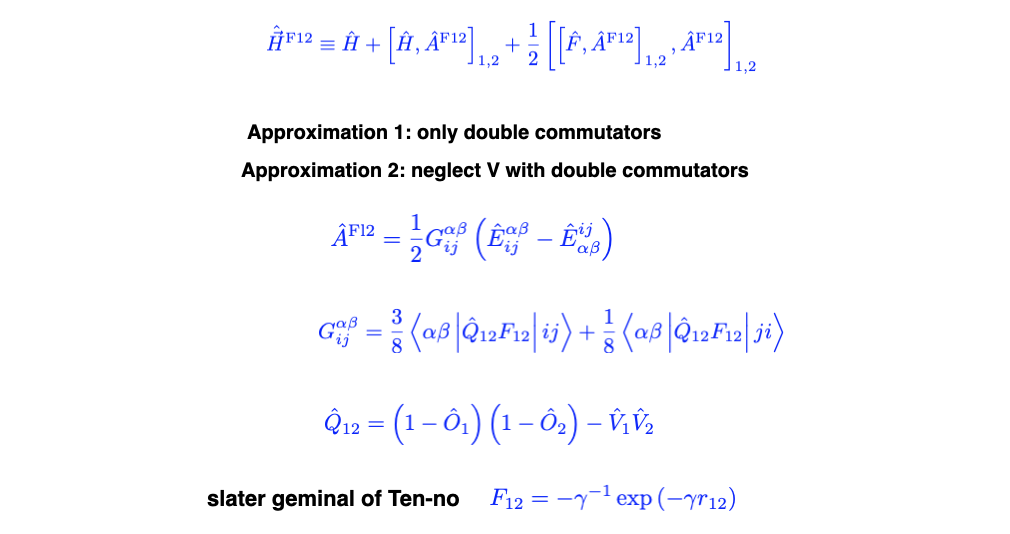

In [8]:
# lets define all the ground state operators here!

F1=initialze_stoperator('F1',1.0,[['p0'],['q0']])
V2=initialze_stoperator('V2',0.5,[['p0','q0'],['r0','s0']])
R2=initialze_stoperator('R2',0.5,[['A0','B0'],['i0','j0']])
R22=initialze_stoperator('R2',0.5,[['A1','B1'],['i1','j1']])
R2D=initialze_stoperator('R2',0.5,[['i0','j0'],['A0','B0']])
R22D=initialze_stoperator('R2',0.5,[['i1','j1'],['A1','B1']])

# 1.  [F1, R2-R2+] 


# a) [F1, R2] - b) [F1,R2+]


# 2.  [[F1, R2-R2+], R2-R2+] 


# a) [[F1, R2], R2] - b) [[F1, R2], R2+] - c) [[F1,R2+],R2] + d) [F1,R2+],R2+]


# 3.  [V2, R2-R2+]

# a) [V2,R2] - b) [V2,R2+]

In [9]:
# 1. a)

F1R2=comm([F1],[R2],1)
pt.print_terms(F1R2,'F1R2.txt')

print('Simplification!')
simplify_for_HF(F1R2)
pt.print_terms(F1R2,'F1R2_new.txt')

# # 1 b) 

# F1R2D=comm([F1],[R2D],1)
# pt.print_terms(F1R2D,'F1R2D.txt')

# simplify_for_HF(F1R2D)
# pt.print_terms(F1R2,'F1R2D_new.txt')

a.st:  [[[OP^['p0']_['q0']]]]
a.co:  [[[1, 1]]]
there are contractions in this commutator
doing contraction through multi_cont
t1.st
[[OP^['p0']_['q0']]]
t1.co
[[1, 1]]
t2.st
[[OP^['A0', 'B0']_['i0', 'j0']]]
t2.co
[[1, 1]]
string1_upper
['p0']
string2_upper
['A0', 'B0']
string1_lower
['q0']
string2_lower
['i0', 'j0']
My String1
[['p0'], ['q0']]
My String2
[['A0', 'B0'], ['j0', 'i0']]
item1
p0
item1
q0
################################################
i_c
0
a i u full poss full_pos
deque([p0, q0, A0, B0]) deque([p0, q0, j0, i0]) deque([p0, q0]) [p0, q0, A0, B0, j0, i0] deque([deque([j0, i0]), deque([A0, B0]), deque([]), deque([]), deque([]), deque([])]) [1, 2, 3, 4, 5, 6]
item name is  q0
item name is  i0
item name is  j0
output lim_cnt==0
2
1
6
5
4
3
spin output 0
spin output 2
spin output 1
spin output 2
spin output 1
spin output 0
\Gamma^p0_{j0}
const of expression and cummulant 0.5 0.0
loop start executed
trying to find the same spin in upper
2. trying to find the same spin in upper 

In [ ]:
# 2 a)

F1R2R2=comm(comm([F1],[R2],0),[R22],1)
pt.print_terms(F1R2R2,'F1R2R2.txt')

simplify_for_HF(F1R2R2)
pt.print_terms(F1R2R2,'F1R2R2_new.txt')

# 2 b)***

F1R2R2D=comm(comm([F1],[R2],0),[R22D],1)
pt.print_terms(F1R2R2D,'F1R2R2D.txt')

simplify_for_HF(F1R2R2D)
pt.print_terms(F1R2R2D,'F1R2R2D_new.txt')

# 2 c)

F1R2DR2=comm(comm([F1],[R2D],0),[R22],1)
pt.print_terms(F1R2DR2,'F1R2DR2.txt')

simplify_for_HF(F1R2DR2)
pt.print_terms(F1R2DR2,'F1R2DR2_new.txt')

# 2 d)

F1R2DR2D=comm(comm([F1],[R2D],0),[R22D],1)
pt.print_terms(F1R2DR2D,'F1R2DR2D.txt')

simplify_for_HF(F1R2DR2D)
pt.print_terms(F1R2DR2D,'F1R2DR2D_new.txt')


In [ ]:
# # 3 a)

# V2R2=comm([V2],[R2],1)
# pt.print_terms(V2R2,'V2R2.txt')

# simplify_for_HF(V2R2)
# pt.print_terms(V2R2,'V2R2_new.txt')

# # 3 b)

# V2R2D=comm([V2],[R2D],1)
# pt.print_terms(V2R2D,'V2R2D.txt')

# simplify_for_HF(V2R2D)
# pt.print_terms(V2R2D,'V2R2D_new.txt')

# THINGS TO DO!!!


# 1) convert the latex expressions into einsum expressions!!! --> in progress!

Ex:

L2(i,j,a,b) <-- 0.5 * L_ijef * W_efab

rhs_L2 += 0.5 * np.einsum('ijef,efab->ijab', L2, Wabef)

# Need to construct different blocks of the Hamiltonian

# Fock:

f_ov --> occupied-virtual
f_vv --> virtual-virtual
f_vo --> virtual-occupied
f_ov --> occupied-virtual

# Coulomb operator:

g_vvvv, g_oooo, g_ovov, g_ovvv, g_vvvo etc.

Text: 

-0.0625\sum_{i1 j1 A1 B1 p0 q0 A0 B0 i0 j0}R^{i1j1}_{A1B1}F^{p0}_{q0}R^{A0B0}_{i0j0}\gamma^['p0']_['j0']\gamma    ^['i1']_['q0']\delta^['A0']_['A1']E^{j1B0}_{B1i0}\\

Einsum:

g_ovvo += -0.0625 * np.einsum('i1j1A1B1,A0B0i0j0,p0j0,i1q0,A0A1->j1B0B1i0', R2, R2D, gamma, gamma, delta)


# 2. Grab all the F12 integrals, intermediates and the Hamiltonian from MPQC 
                               

# 3. Identify standard F12 intermediates from the text expressions! 

# 4. Reproduce ground state energies obtained previously to validate
#     the code

# 5. Add the remaining operators for excited states


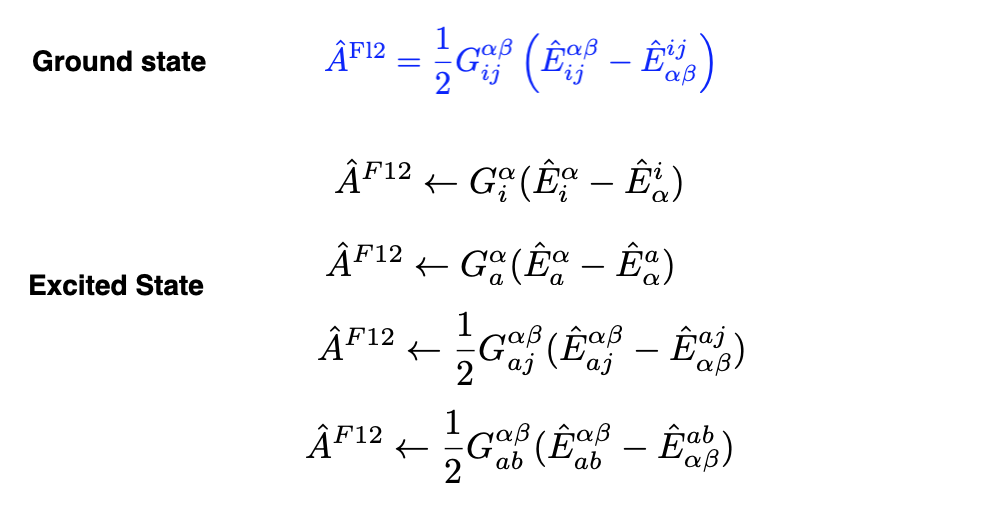
